
# PREDICTING THE HOUSE PRICES USING RIDGE AND LASSO REGRESSION



# DATA REVIEW


- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

#  I. LIBRARIES 


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# II. DATASET

In [ ]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [ ]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# III. VISUALIZATION

In [ ]:
house_df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

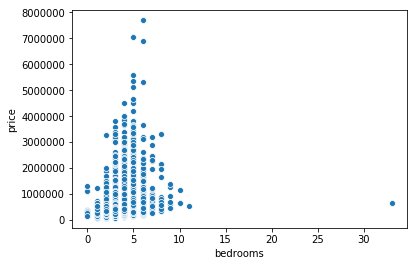

In [ ]:
sns.scatterplot(x = 'bedrooms', y = 'price', data = house_df)

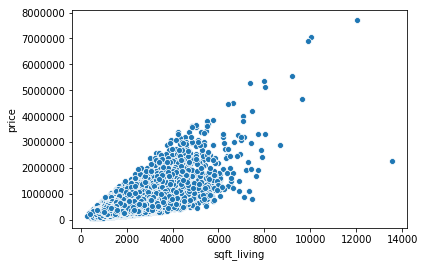

In [ ]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

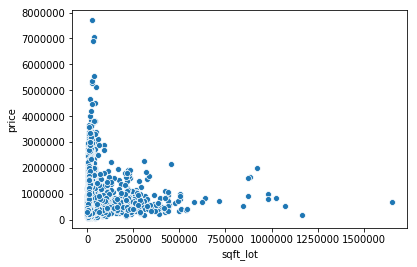

In [ ]:
sns.scatterplot(x = 'sqft_lot', y = 'price', data = house_df)

In [ ]:
house_df.hist(bins=20,figsize=(20,20), color = 'r')

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(house_df.corr(), annot = True)

In [ ]:
sns.pairplot(house_df)

In [ ]:
# pick a sample of the data
house_df_sample =house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']]


In [ ]:
sns.pairplot(house_df_sample)

# IV. CREATING TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [ ]:
X.shape

(21613, 19)

In [ ]:
y = house_df['price']

In [ ]:
y.shape

(21613,)

# V. TRAINING THE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-3.70997927e+04  4.22446125e+04  9.48927670e+01  1.66481446e-01
  1.58655850e+04  3.72038673e+01  5.76888999e+01  5.99607407e+05
  4.86689282e+04  2.91736031e+04  9.59738504e+04  3.72038673e+01
 -2.62198714e+03  1.75435007e+01 -5.49148567e+02  5.97622560e+05
 -1.90936815e+05  2.39336667e+01 -3.53247521e-01]
Linear Model Coefficient (b):  6575935.211256638


# VI. MODEL EVALUATION

# LINEAR REGRESSION

In [ ]:
y_predict_linear = regressor.predict( X_test)
y_predict_linear

array([ 503399.42930787,  782643.81421884,  765447.46005361, ...,
        356963.19626075,  904978.55145679, 1181927.37697986])

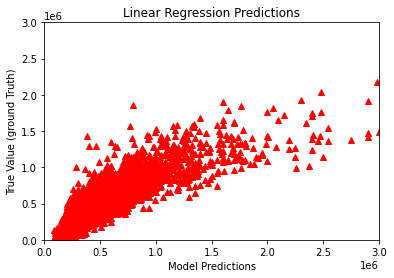

In [ ]:
plt.plot(y_test, y_predict_linear, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
y_predict = y_predict_linear
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('LINEAR:','\nRMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


LINEAR: 
RMSE = 224125.974 
MSE = 50232452196.83476 
MAE = 127306.57937766743 
R2 = 0.6789462291244768 
Adjusted R2 = 0.6775286084768739


# RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Lasso, Ridge

regressor_ridge = Ridge(alpha = 50) # alpha zmienia nachylenie prostej
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_predict_ridge = regressor_ridge.predict( X_test)
y_predict_ridge

Linear Model Coefficient (m):  [-3.85101565e+04  4.21583786e+04  9.63849788e+01  1.29909745e-01
  1.94875083e+04  3.60026351e+01  6.03823239e+01  4.10864993e+05
  5.59000821e+04  2.82552254e+04  9.89224669e+04  3.60026402e+01
 -2.76392069e+03  1.78248234e+01 -4.52754834e+02  5.05608187e+05
 -1.47283756e+05  2.29204720e+01 -3.72308369e-01]
Linear Model Coefficient (b):  7095823.50130152


array([ 506378.43974327,  774963.01640777,  758767.57786682, ...,
        363071.60347358,  909741.90568884, 1170476.84543933])

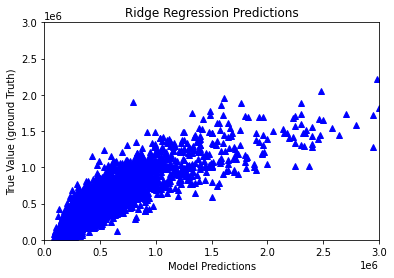

In [ ]:
plt.plot(y_test, y_predict_ridge, "^", color = 'b')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

In [ ]:
y_predict = y_predict_ridge
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RIDGE:','\nRMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RIDGE: 
RMSE = 224878.563 
MSE = 50570368292.01956 
MAE = 126953.34239070155 
R2 = 0.6767864851371934 
Adjusted R2 = 0.6753593280880665


# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

regressor_lasso = Lasso(alpha = 500)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict_lasso = regressor_lasso.predict( X_test)
y_predict_lasso

Linear Model Coefficient (m):  [-3.65359065e+04  4.04981096e+04  2.58274540e+02  1.45951354e-01
  1.54494939e+04  2.55390788e+01 -1.02837860e+02  5.24344390e+05
  5.12037091e+04  2.75087851e+04  9.73612851e+04 -1.14265018e+02
 -2.68396105e+03  1.78639769e+01 -4.79914773e+02  5.65442465e+05
 -1.46375363e+05  2.24793254e+01 -3.75701129e-01]
Linear Model Coefficient (b):  6883912.987809489


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313060956191276.06, tolerance: 223613542009.7309
  positive)


array([ 509804.05290406,  782173.77920703,  767095.41363806, ...,
        360392.19991284,  908792.71737052, 1176206.79209731])

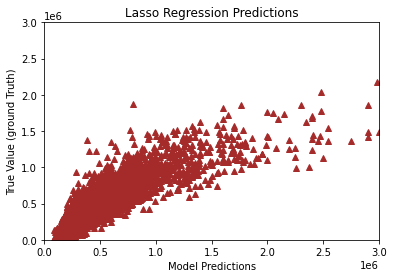

In [ ]:
plt.plot(y_test, y_predict_lasso, "^", color = 'brown')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Lasso Regression Predictions')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

y_predict=y_predict_lasso
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('LASSO:','\nRMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


LASSO: 
RMSE = 224313.985 
MSE = 50316763760.98951 
MAE = 126872.44691078455 
R2 = 0.6784073634227941 
Adjusted R2 = 0.6769873634007242
